# 绘制PRD整体的气象要素贡献

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

## 把RH换成QV后

In [2]:
filepath = datadir + 'Contribution/Annually/RandomForest_output/RH_to_QV/'
df = pd.read_excel(filepath + 'RF_PRD_merge.xlsx', index_col=0,header=[0])
df

,Low,High,Diff
SFC_TMP,0.215348,0.254294,0.091789
SOL_RAD,0.401932,0.387844,0.059933
QV,0.107063,0.148820,0.301457
PRES,0.040505,0.037180,0.155182
WSPD10,0.104052,0.064912,0.154251
WDIR10,0.042568,0.037890,0.123224
CloudFRAC,0.088532,0.069061,0.114165
mse,212.488676,212.979907,163.201067
r2,0.882492,0.868173,0.850460


In [3]:
variants = ['SFC_TMP', 'SOL_RAD', 'QV', 'PRES',
            'WSPD10', 'WDIR10', 'CloudFRAC']

df = df.loc[variants]

# 设置各要素对应的颜色
factor_color = {
    'SFC_TMP'  : '#ffbe7a',
    'SOL_RAD'  : '#e88482',
    'QV'       : '#82b0d2',
    'PRES'     : '#beb8dc',
    'WSPD10'   : '#45917c',
    'WDIR10'   : '#799a87',
    'CloudFRAC': '#c5b9a5'
}

# 旧版本

In [4]:
df_avg = (df['Low'] + df['High'])/2
df_dif = (df['High'] - df['Low'])

df_avg.sort_values(ascending=True, inplace=True)
df_dif.sort_values(ascending=True, inplace=True)

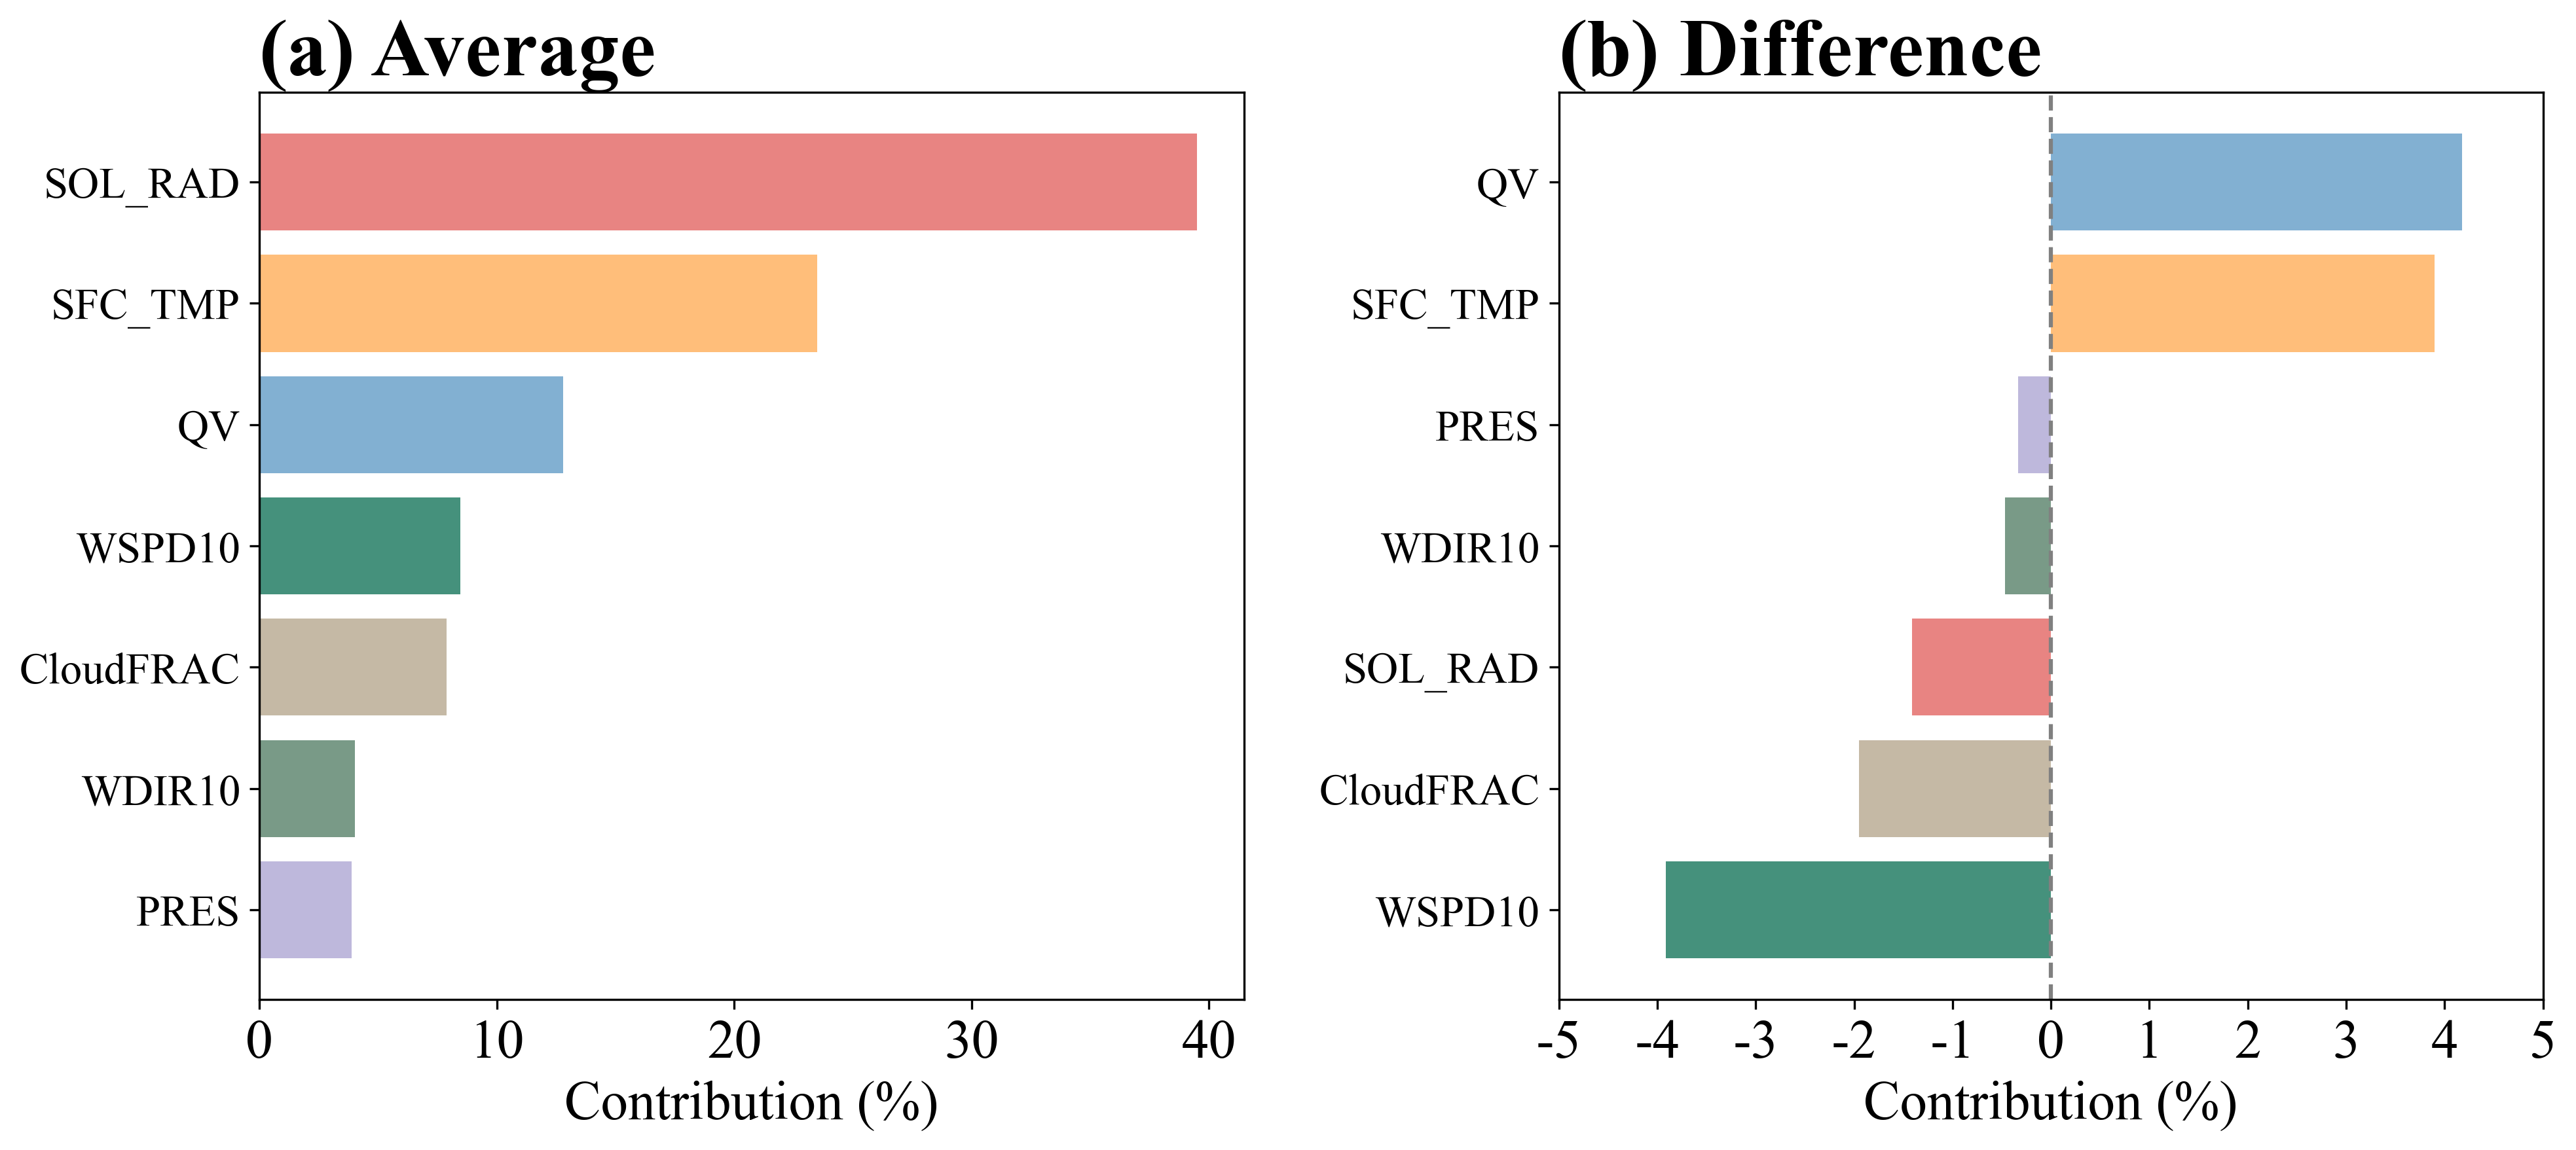

In [23]:
avg_colors = [factor_color[factor] for factor in df_avg.index]
dif_colors = [factor_color[factor] for factor in df_dif.index]

fig = plt.figure(figsize=(15, 6),dpi=300)
ax1,ax2 = fig.subplots(1,2)

ax1.barh(df_avg.index, df_avg, color=avg_colors)
xticks = np.arange(0, 0.41, 0.1)
ax1.set_xticks(xticks)
ax1.set_xticklabels(['{:.0f}'.format(x*100) for x in xticks], fontsize=20)

ax2.barh(df_dif.index, df_dif, color=dif_colors)
ax2.axvline(x=0, color='gray', linestyle='--')
xticks = np.arange(-0.05, 0.051, 0.01)
ax2.set_xticks(xticks)
ax2.set_xticklabels(['{:.0f}'.format(x*100) for x in xticks], fontsize=20)

ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=16)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=16)

ax1.set_xlabel('Contribution (%)', fontsize=20)
ax2.set_xlabel('Contribution (%)', fontsize=20)

title_dict={'fontsize':30,'fontweight':'bold','loc':'left'}
ax1.set_title('(a) Average',**title_dict)
ax2.set_title('(b) Difference',**title_dict)
plt.subplots_adjust(wspace=0.32)
plt.show()

# 05.08改

In [7]:
low  = df['Low'].copy()
high = df['High'].copy()

low.sort_values(ascending=True, inplace=True)
high.sort_values(ascending=True, inplace=True)

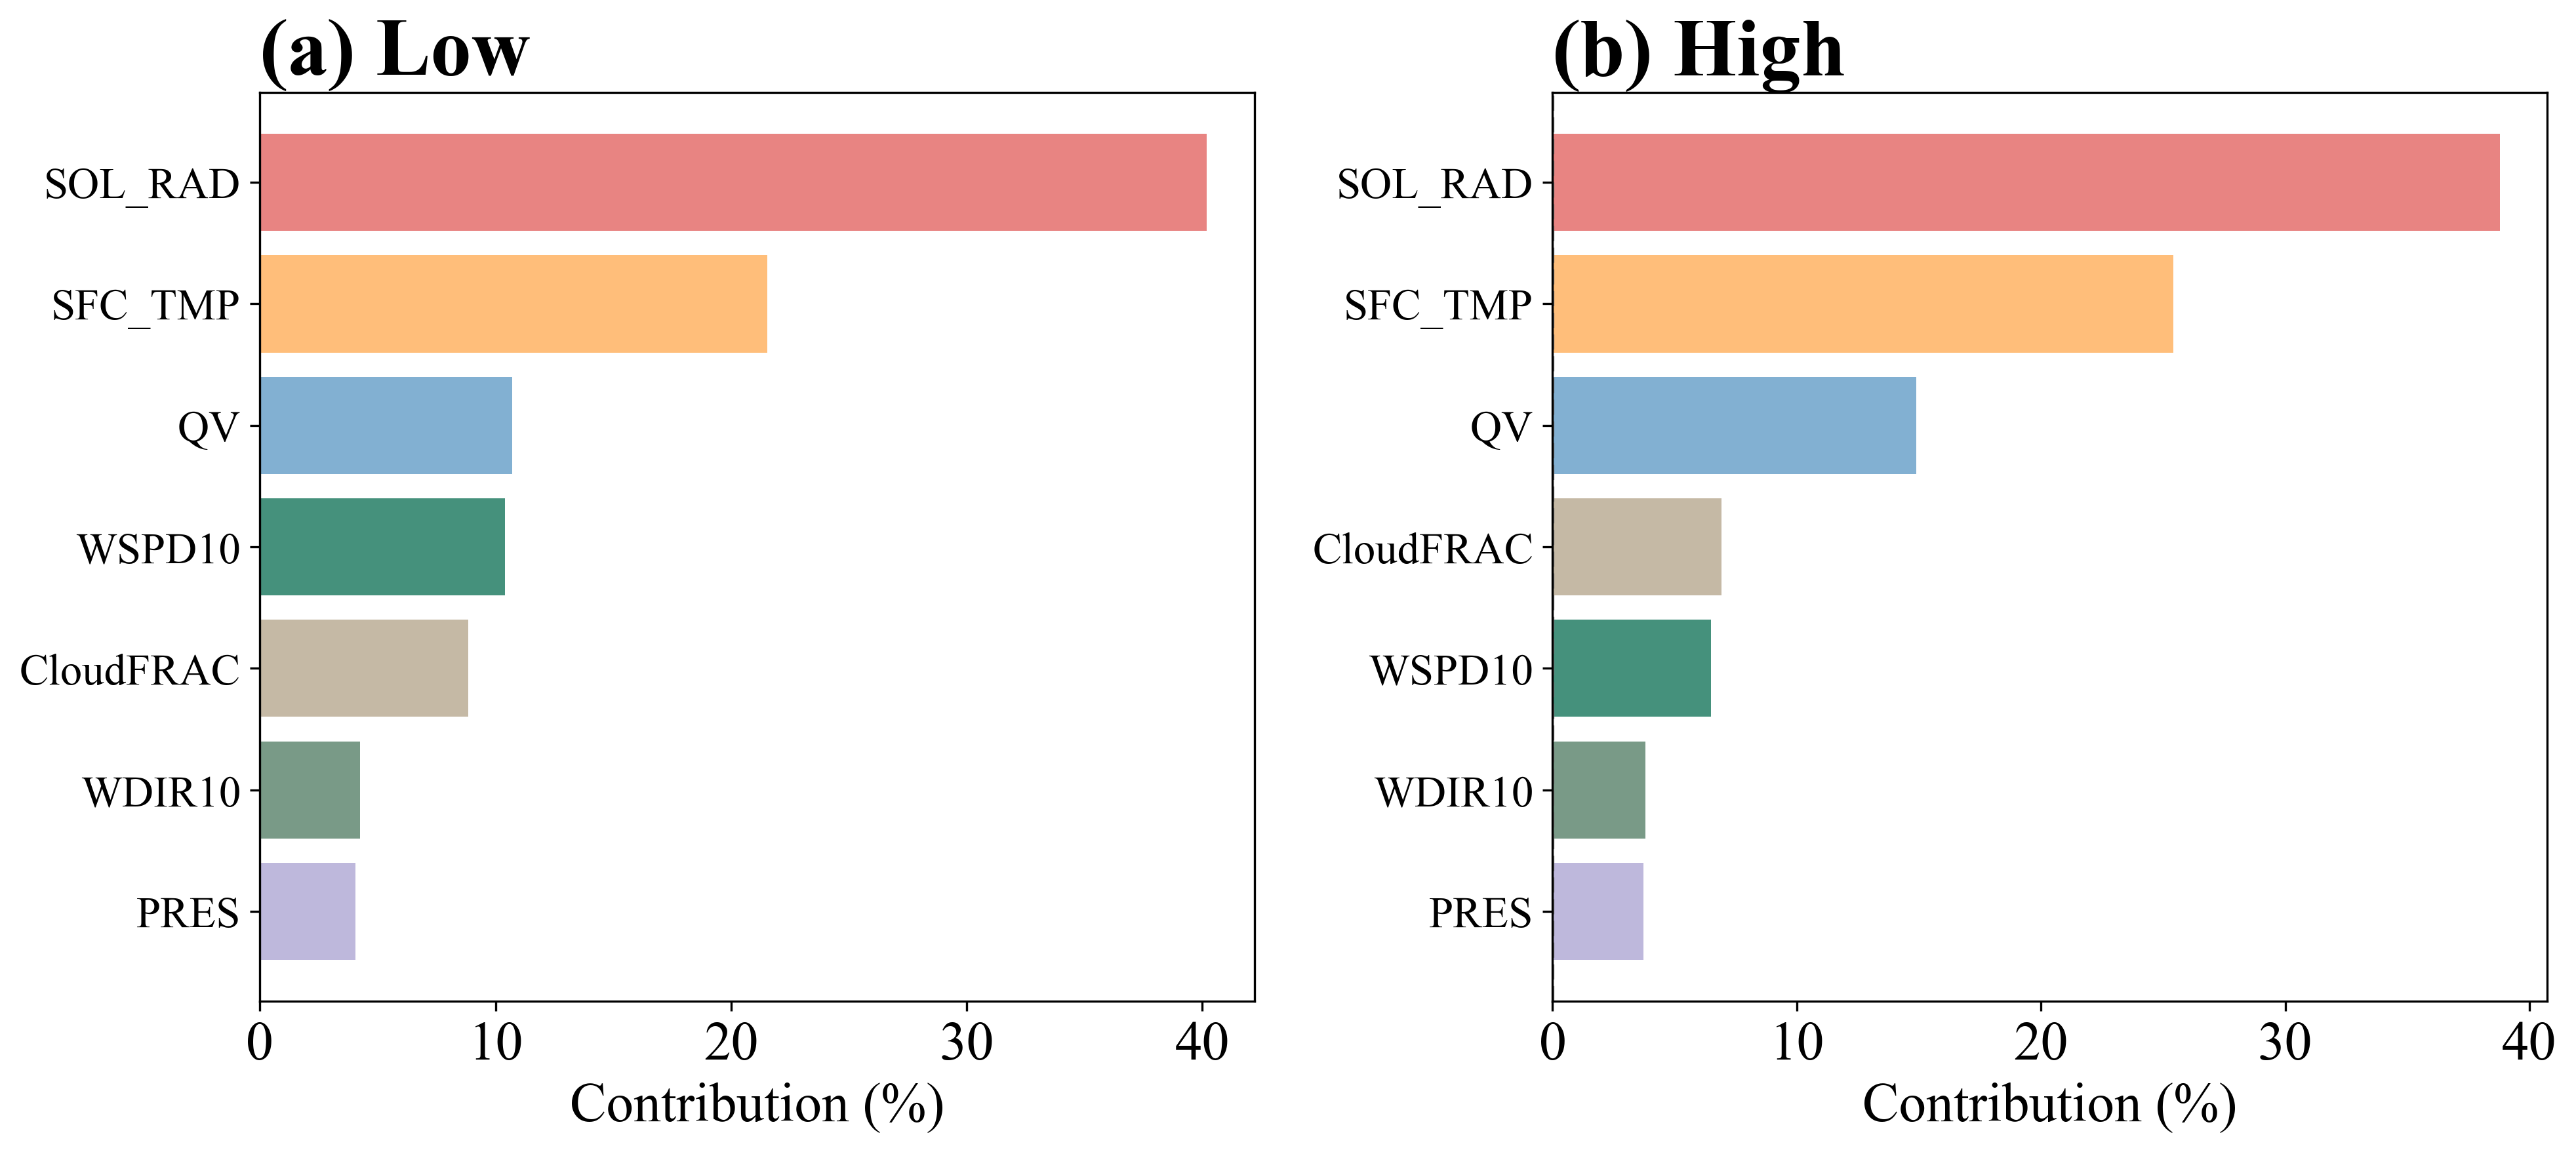

In [13]:
low_colors = [factor_color[factor] for factor in low.index]
high_colors = [factor_color[factor] for factor in high.index]

fig = plt.figure(figsize=(15, 6),dpi=300)
ax1,ax2 = fig.subplots(1,2)

ax1.barh(low.index, low, color=low_colors)
xticks = np.arange(0, 0.41, 0.1)
ax1.set_xticks(xticks)
ax1.set_xticklabels(['{:.0f}'.format(x*100) for x in xticks], fontsize=20)

ax2.barh(high.index, high, color=high_colors)
ax2.axvline(x=0, color='gray', linestyle='--')
xticks = np.arange(0, 0.41, 0.1)
ax2.set_xticks(xticks)
ax2.set_xticklabels(['{:.0f}'.format(x*100) for x in xticks], fontsize=20)

ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=16)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=16)

ax1.set_xlabel('Contribution (%)', fontsize=20)
ax2.set_xlabel('Contribution (%)', fontsize=20)

title_dict={'fontsize':30,'fontweight':'bold','loc':'left'}
ax1.set_title('(a) Low',**title_dict)
ax2.set_title('(b) High',**title_dict)
plt.subplots_adjust(wspace=0.3)
plt.show()